# Loading dependencies

In [1]:
import numpy as np
import skimage as ski
from skimage import io, color, exposure
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Point processing

Point processing takes each pixel value and processes them through a function -

$$I_{processed} = f(I)$$

Since it processes all the pixels, it can be regarded as a global processing.

In [2]:
np.random.seed(43)
I = np.random.rand(3, 3)
print(I)

[[0.11505457 0.60906654 0.13339096]
 [0.24058962 0.32713906 0.85913749]
 [0.66609021 0.54116221 0.02901382]]


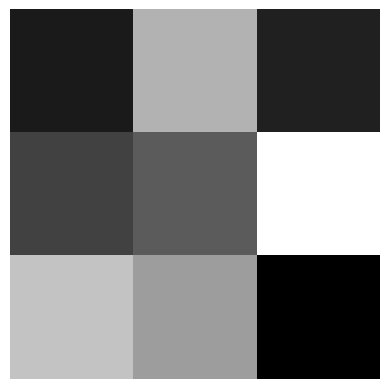

In [ ]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

In [3]:
I2 = I + 0.5
print(I2)

[[0.61505457 1.10906654 0.63339096]
 [0.74058962 0.82713906 1.35913749]
 [1.16609021 1.04116221 0.52901382]]


[[0.61505457 1.         0.63339096]
 [0.74058962 0.82713906 1.        ]
 [1.         1.         0.52901382]]


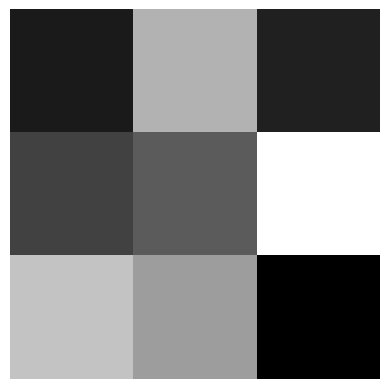

In [4]:
# option 1
I2[I2 > 1] = 1
I2[I2 < 0] = 0

# option 2
I2 = np.clip(I+0.5, 0, 1)
#plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off");

print(I2)

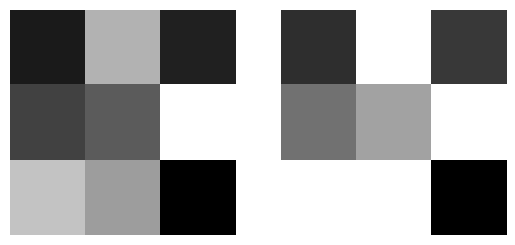

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off");

plt.subplot(1, 2, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

In [ ]:
I3 = np.clip(I - 0.5, 0, 1)

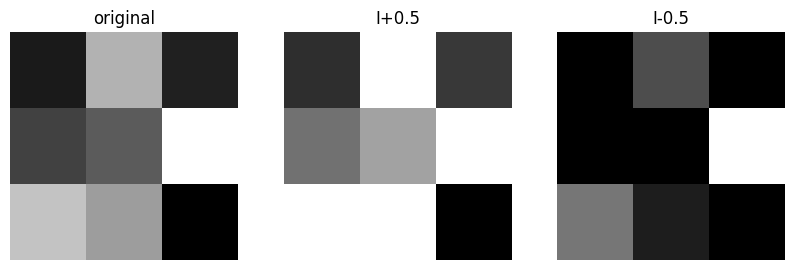

In [ ]:
plt.figure(figsize = (10, 18))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.title("original");

plt.subplot(1, 3, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off")
plt.title("I+0.5");

plt.subplot(1, 3, 3)
plt.imshow(I3, cmap = 'grey')
plt.axis("off")
plt.title("I-0.5");

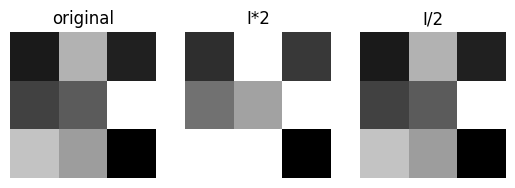

In [ ]:
I2 = np.clip(I*2, 0, 1)
I3 = np.clip(I/2, 0, 1)

plt.subplot(1, 3, 1)
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.title("original");

plt.subplot(1, 3, 2)
plt.imshow(I2, cmap = 'grey')
plt.axis("off")
plt.title("I*2");

plt.subplot(1, 3, 3)
plt.imshow(I3, cmap = 'grey')
plt.axis("off")
plt.title("I/2");

# Landsat image

In [5]:
I = io.imread("sample_1.jpeg")

Typically, skimage loads image in 8 bit format. However, skimage can also load 16 and 32 bit images.

In [6]:
print(I.dtype)

uint8


In [7]:
I = ski.img_as_float(I)
I.shape

(1901, 2010)

In [ ]:
print(I.min())
print(I.max())

0.0
1.0


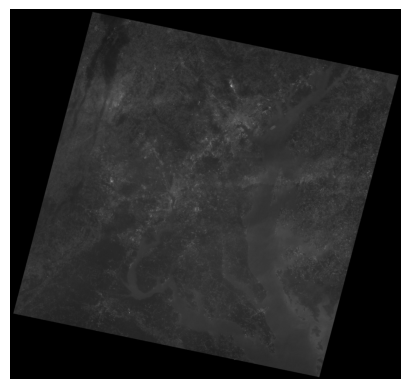

In [ ]:
plt.imshow(I, cmap = 'grey')
plt.axis("off")
plt.show()

Lets contrast stretch the image using the function -
$$I_{out} = 4 * (I_{in} - 0.1) $$


/var/folders/70/0rb261jx301_1zt04645z6b00000gn/T/ipykernel_9770/2484297385.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_stretched)


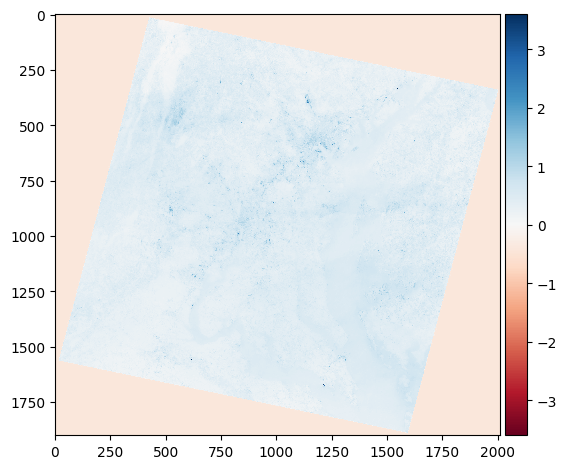

In [11]:
#WRONG
I_stretched = 4*(I-0.1)
io.imshow(I_stretched)

In [9]:
print(I_stretched.min())
print(I_stretched.max())

-0.4
3.6


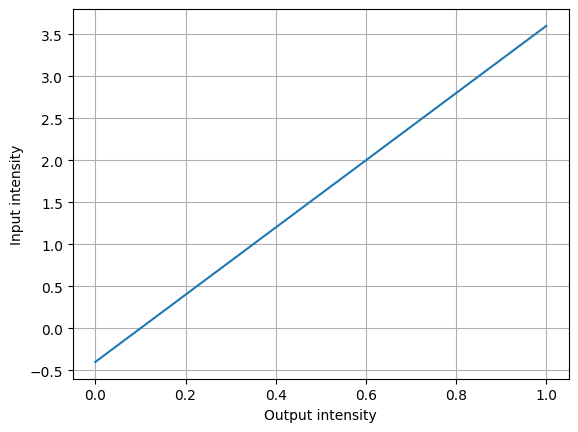

In [12]:
i_1 = np.linspace(0, 1, 10000)
i_2 = 4*(i_1 - 0.1)
plt.plot(i_1, i_2);
plt.grid();
plt.xlabel("Output intensity");
plt.ylabel("Input intensity");

The values on the output side exceeds the range [0, 1]

/var/folders/70/0rb261jx301_1zt04645z6b00000gn/T/ipykernel_9770/3699114823.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_stretched)


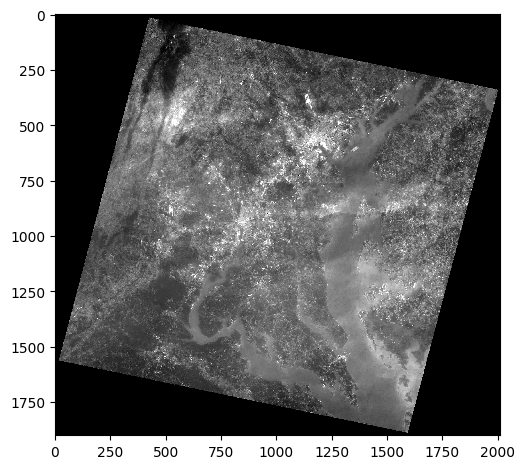

In [14]:
#RIGHT
I_stretched = np.clip(4*(I-0.1), 0, 1)
io.imshow(I_stretched)

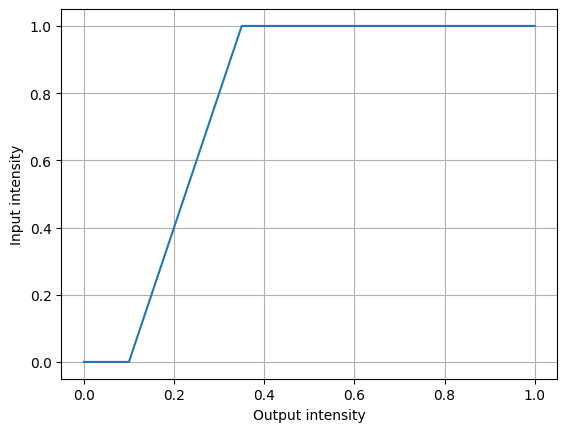

In [ ]:
i_1 = np.linspace(0, 1, 10000)
i_2 = np.clip(4*(i_1 - 0.1), 0, 1)
plt.plot(i_1, i_2);
plt.grid();
plt.xlabel("Output intensity");
plt.ylabel("Input intensity");

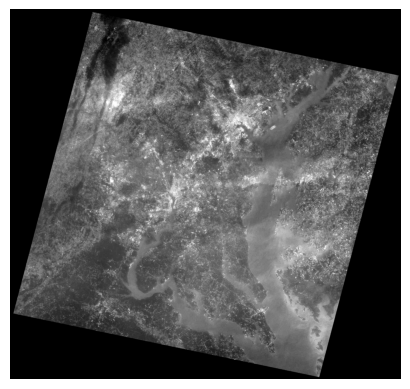

In [ ]:
plt.imshow(I_stretched, cmap = 'grey');
plt.axis("off")
plt.show()

So the image is brighter now. But why did this work? How did we get this function? We got it from the histogram.

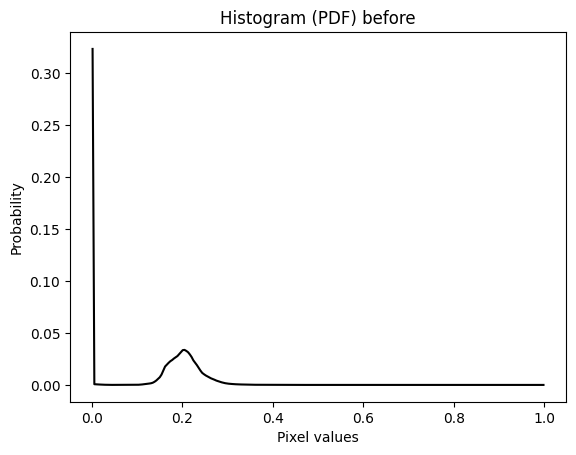

In [ ]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) before");

Pixel values saturated in 0.1 to 0.35 region, the same region where we are stretching the contrast.

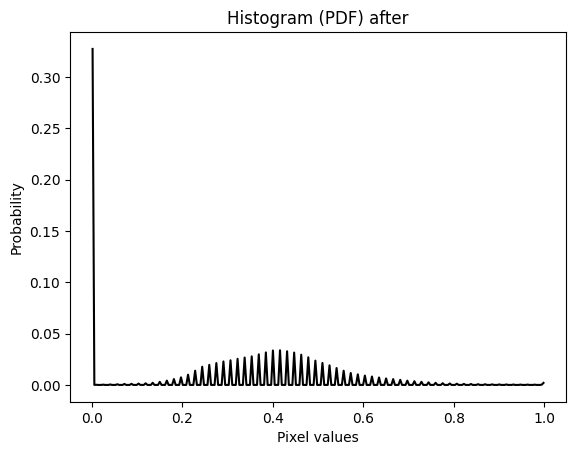

In [ ]:
hist, bins_hist = exposure.histogram(I_stretched, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) after");

The pixel values are now more spread out. The sharp shape comes from discretizing the values into bin. Look up histograms to understand. Increase bins for smoother graph.

So how can we derive the contrast strectching function? Follow this formula -

$$I_{streched} = \frac{I - c_{min}}{c_{max} - c_{min}}*(I_{max} - I_{min}) + I_{min}$$

Here, $C_{min}$ is the lower pixel value from the histogram that you would like to stretch to $I_{min}$, $C_{max}$ is the upper pixel value from the histogram that you would like to strectch to $I_{max}$.

For normalized image, $I_{max} = 1$ and $I_{min} = 0$

In this certain example, $c_{min} = 0.1$ and $c_{max} = 0.35$. So the formula boils down to -

$$I_{streched} = \frac{I - 0.1}{0.35 - 0.1}*(1 - 0) + 0 = 4*(I - 0.1)$$

which is our exact formula.



**Derivation -**

The formula is basically derived from the output intensity vs the input intensity curve.

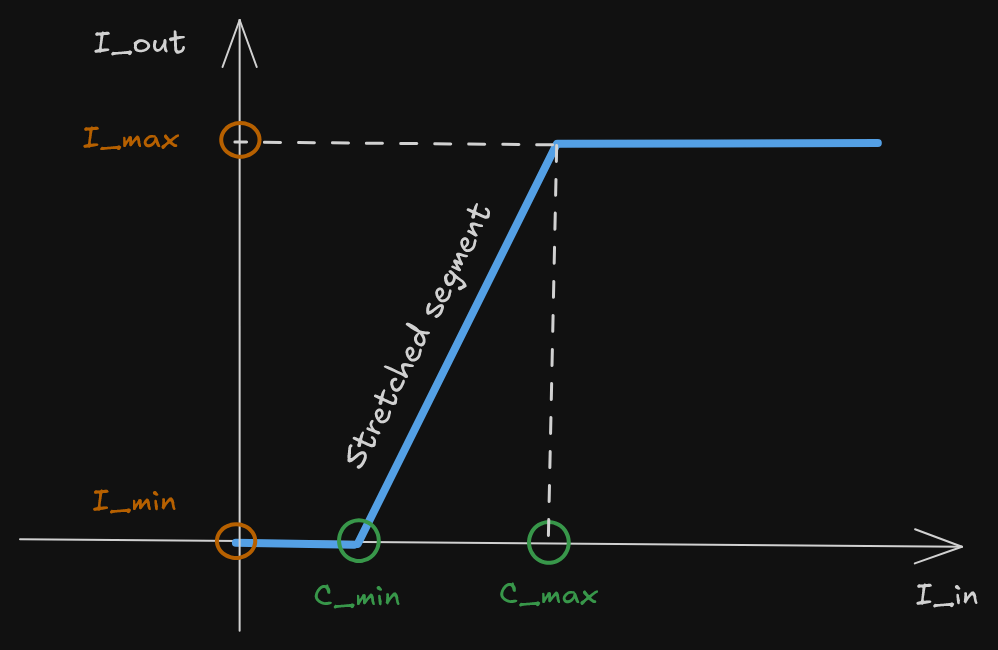

Here for the stretched segment, using the straight line equation $\frac{y_2 - y_1}{x_2 - x_1} = \frac{y - y_1}{x - x_1}$, we get -

$$\frac{I_{max} - I_{min}}{c_{max} - c_{min}} = \frac{I_{out} - I_{min}}{I_{in} - c_{min}}$$

$$or, \ I_{out} = \frac{(I_{in} - c_{min})*(I_{max} - I_{min})}{c_{max} - c_{min}} + I_{min}$$

Renaming the variables, $I_{out} \to I_{stretched}$ and $I_{in} \to I$, we get -

$$I_{streched} = \frac{I - c_{min}}{c_{max} - c_{min}}*(I_{max} - I_{min}) + I_{min}$$

We are not interested in the segment outside the stretched region as they will be clipped.

**Caveats -**

This formula works for only this kind of transformation. Different graphs, should be handled differently.

#Chest x-ray

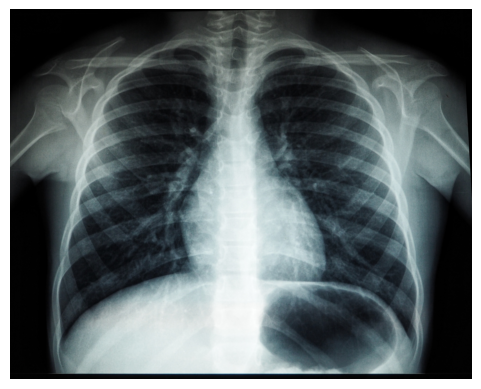

In [15]:
I = io.imread("sample_2.jpeg")/255
plt.imshow(I)
plt.axis("off");

In [16]:
I = color.rgb2gray(I)

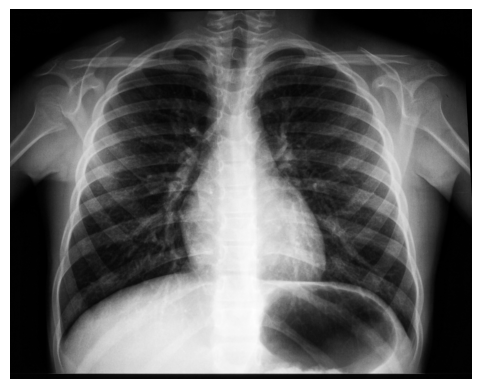

In [17]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

In this chest x-ray, a lot of details fall on the low intensity side and is quite hard to visualize. To increase the contrast on the low intensity side, we can use the logarithmic transformation -

$$I_{out} = c*log(1 + k*I_{in})$$

here, $k$ determines how strong the stretching should be and $c$ is the normalizing factor given by $c = \frac{I_{max}}{log(1 + k*I_{max})}$.

It is to be noted that the standard log transformation formula is -

$$I_{out} = c*log(1 + I_{in})$$

However, we cannot control the stretching in this version.

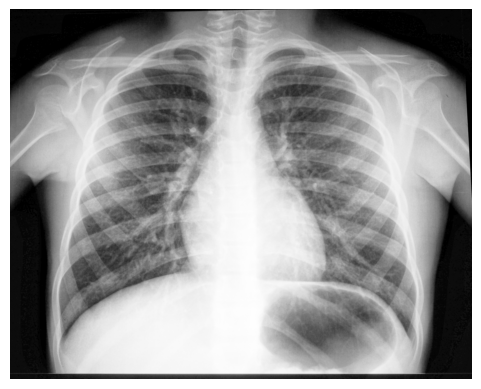

In [ ]:
k = 20
I2 = np.log(1 + k*I)
I2 = I2/I2.max() #multiplying by c
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

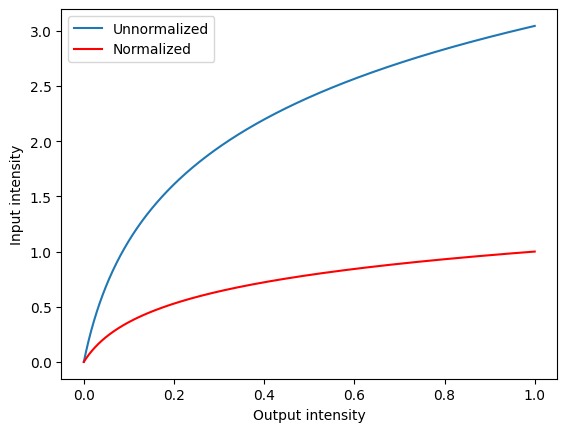

In [ ]:
k = 20
i_1 = np.linspace(0, 1, 10000)
i_2 = np.log(1 + k*i_1)
i_3 = i_2/i_2.max()
plt.plot(i_1, i_2, label = 'Unnormalized');
plt.plot(i_1, i_3, color = 'red', label = 'Normalized');
plt.legend();
plt.xlabel("Output intensity");
plt.ylabel("Input intensity");

Normalizing the mapping function makes the map fit between the range [0, 1].

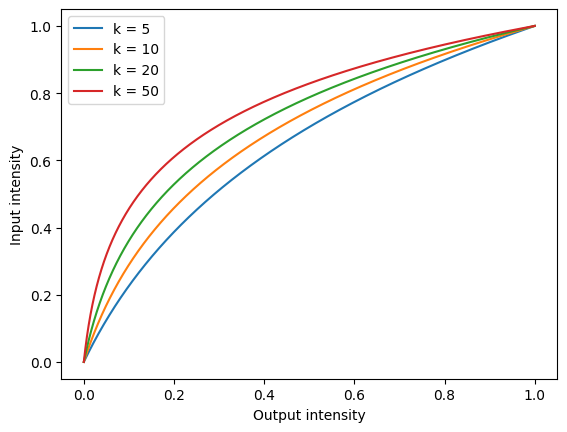

In [ ]:
ks = [5, 10, 20, 50]
for k in ks:
  i_1 = np.linspace(0, 1, 10000)
  i_2 = np.log(1 + k*i_1)
  i_2 = i_2/i_2.max()
  plt.plot(i_1, i_2, label = "k = " + str(k));
  plt.legend();
  plt.xlabel("Output intensity");
  plt.ylabel("Input intensity");

As the value of k increases the lower intensity points are getting stretched whereas the higher intensity points are losing contrast.

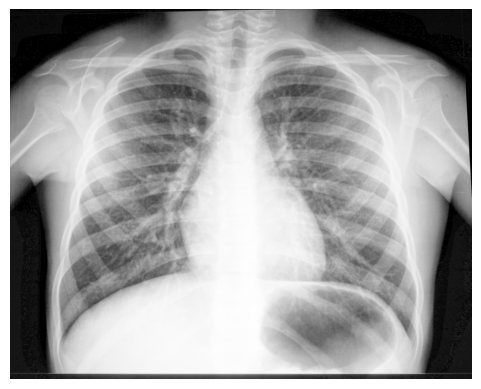

In [ ]:
k = 50
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
plt.imshow(I2, cmap = 'grey')
plt.axis("off");

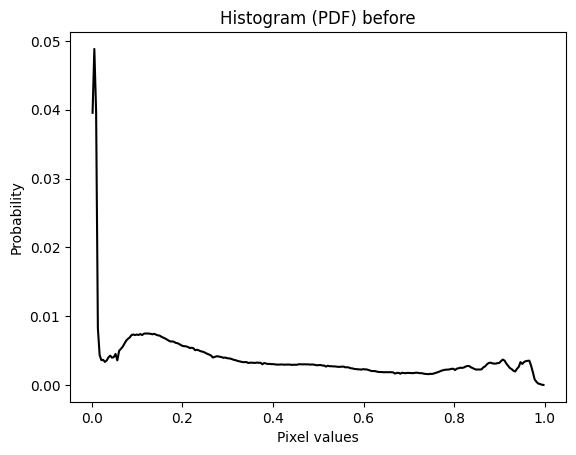

In [ ]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) before");

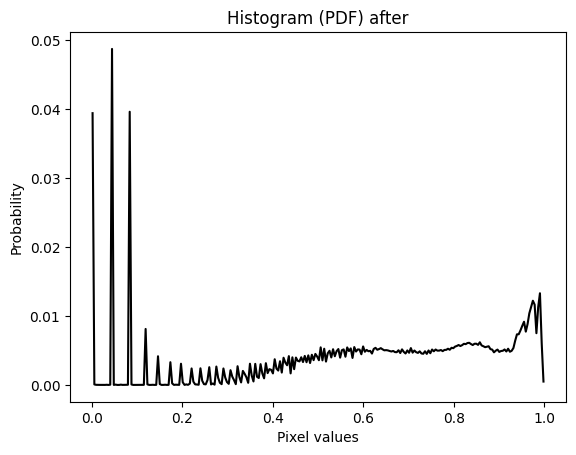

In [ ]:
hist, bins_hist = exposure.histogram(I2, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) after");

Now lets say you want to highlight everything except the bones. How can we do that for this image? Since the bones are highlighted in the original image. We can invert the image.

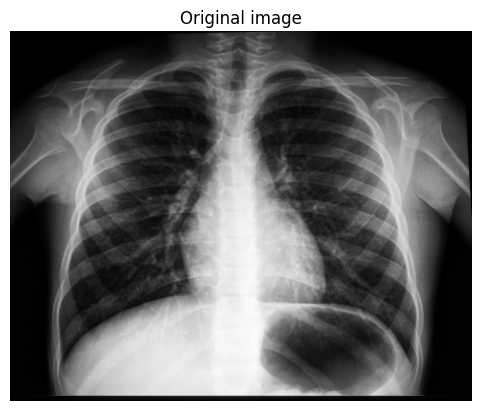

In [ ]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");
plt.title('Original image');

In [ ]:
I3 = 1 - I

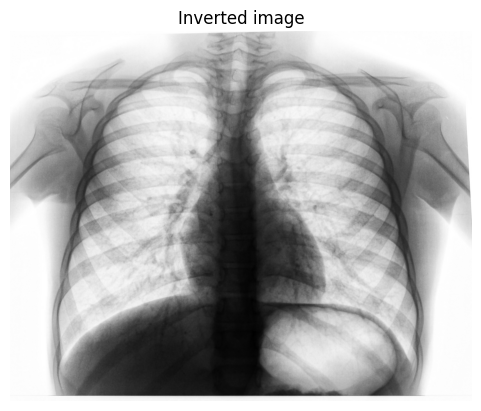

In [ ]:
plt.imshow(I3, cmap = 'grey');
plt.axis("off");
plt.title('Inverted image');

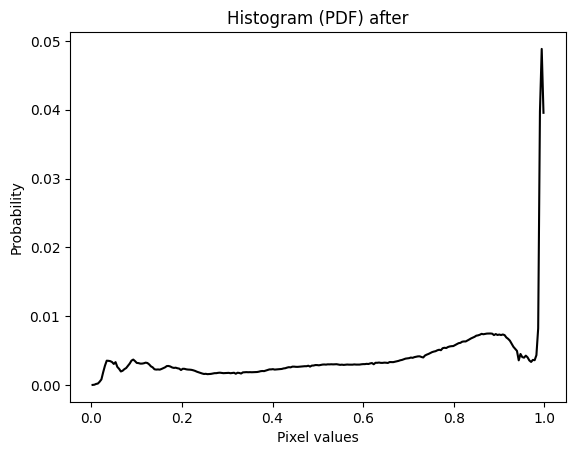

In [ ]:
hist, bins_hist = exposure.histogram(I3, nbins=256, normalize=True)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("Histogram (PDF) after");

We can achieve the same result using exponential transformation, also known as power law transformation -

$$ I_{out} = c*e^{\gamma*I_{in}}$$

if $\gamma < 1$, we get log transformation as before

if $\gamma > 1$, we get anti-log transformation (stretches high intensity values)

In [ ]:
gamma = 0.5
c = 1
I4 = c*(I ** gamma)
print(I4.min())
print(I4.max())

0.0
0.99958324649159


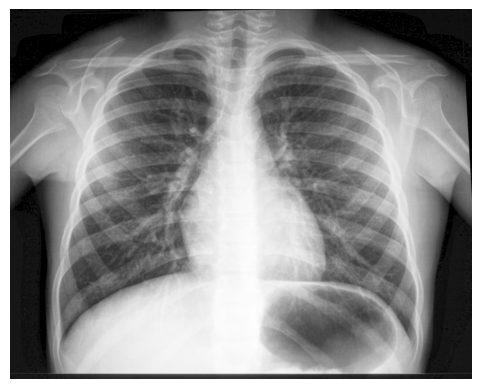

In [ ]:
plt.imshow(I4, cmap = 'grey')
plt.axis("off");

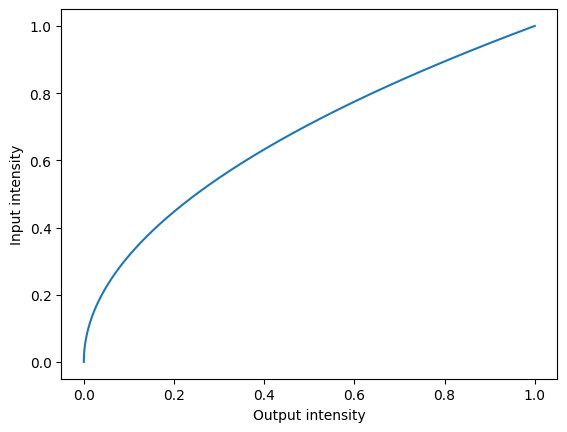

In [ ]:
gamma = 0.5
c = 1
i_1 = np.linspace(0, 1, 10000)
i_2 = c*(i_1 ** gamma)
plt.plot(i_1, i_2);
plt.xlabel("Output intensity");
plt.ylabel("Input intensity");

You get a mapping function similar to the logarithmic transformation.

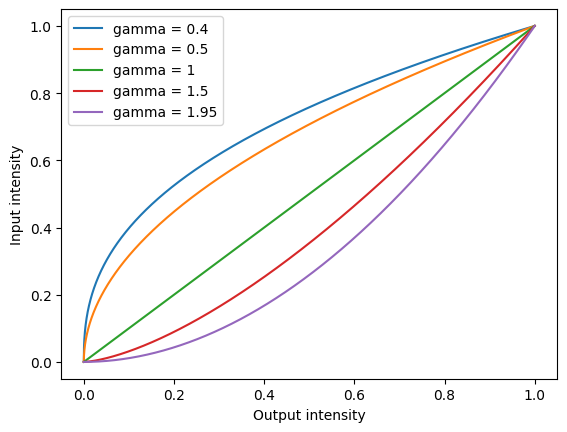

In [ ]:
gammas = [0.4, 0.5, 1, 1.5, 1.95]
for gamma in gammas:
  c = 1
  i_1 = np.linspace(0, 1, 10000)
  i_2 = c*(i_1 ** gamma)
  plt.plot(i_1, i_2, label = "gamma = " + str(gamma));
  plt.legend();
  plt.xlabel("Output intensity");
  plt.ylabel("Input intensity");

Unlike logarithmic transformation, where you could only stretch the contrast of the lower intensity points, in exponential transformation, you can get contrast stretching on the lower intensity range or the higher intensity range based on the gamma value.

#Angiogram

In [ ]:
I = io.imread("/content/sample_3.jpeg")
I = I/255
I.shape

(376, 374)

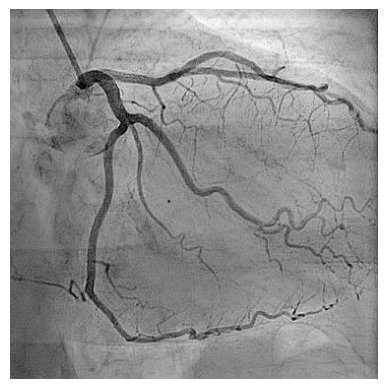

In [ ]:
plt.imshow(I, cmap = 'grey')
plt.axis("off");

In angiogram, we are interested in observing the blood vessels. If that is the case, is there any way to segment the blood vessels from the image? We can apply gray-level slicing.

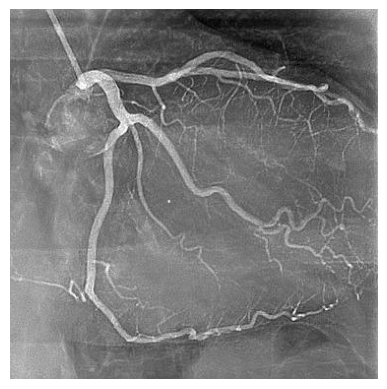

In [ ]:
plt.imshow(1-I, cmap = 'grey')
plt.axis("off");

In [ ]:
negImg = 1 - I

In [ ]:
A = 0.6
B = 0.85
negImg[negImg < A] = 0
negImg[negImg > B] = 0

negImg[(negImg >= A) & (negImg <= B)] = 1

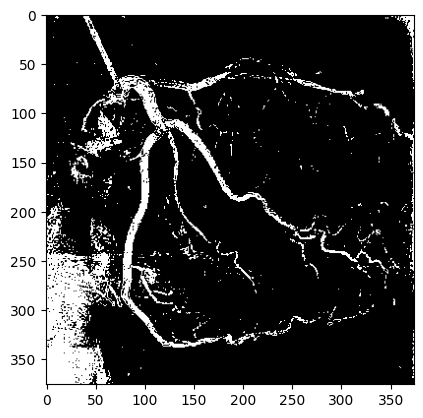

In [ ]:
plt.imshow(negImg, cmap = 'grey');

This is a very crude segmentation and you can see the noise from the process at the bottom left of the binary image. Segmentation is an extensive task that cannot (in most cases) be accomplished just by thresholding.

Also the value was picked from the blood vessel. I am not sure how it was originally done, but I am guessing it was done in Matlab. However, you can do the same using matplotlib as well. You cannot do it in Google Colab, but you can do it in local IDEs.

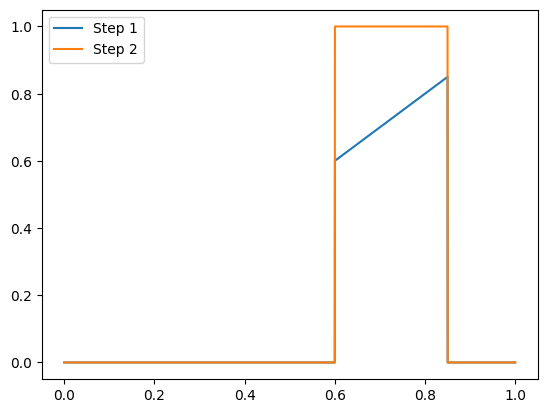

In [ ]:
i_1 = np.linspace(0, 1, 10000)
A = 0.6
B = 0.85
i_2 = i_1.copy()
i_2[i_2 < A] = 0
i_2[i_2 > B] = 0

plt.plot(i_1, i_2, label = 'Step 1')

i_3 = i_2.copy()
i_3[(i_3 >= A) & (i_3 <= B)] = 1

plt.plot(i_1, i_3, label = 'Step 2')
plt.legend();

In [ ]:
negImg = 1 - I

In [ ]:
A = 0.6
B = 0.85

negImg[(negImg >= A) & (negImg <= B)] = 1

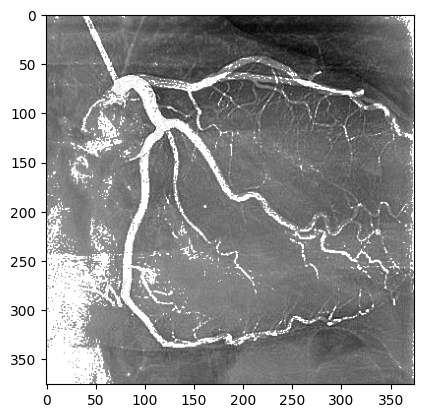

In [ ]:
plt.imshow(negImg, cmap = 'grey');

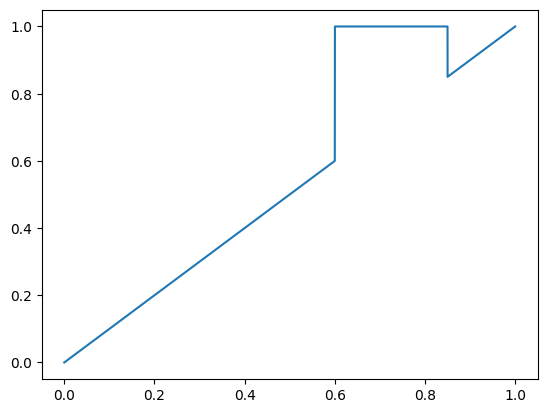

In [ ]:
i_1 = np.linspace(0, 1, 10000)
A = 0.6
B = 0.85

i_2 = i_1.copy()
i_2[(i_2 >= A) & (i_2 <= B)] = 1

plt.plot(i_1, i_2);

# Histogram equalization

Histogram equalization tries to make the PDF of an image more uniform. The mapping function is very simple -

$$I_{equalized} = CDF(I)$$

What is the CDF? CDF is the cumulative distribution function, done by taking cumulative sum of the PDF. It can be visualized easily from the normal distribution -

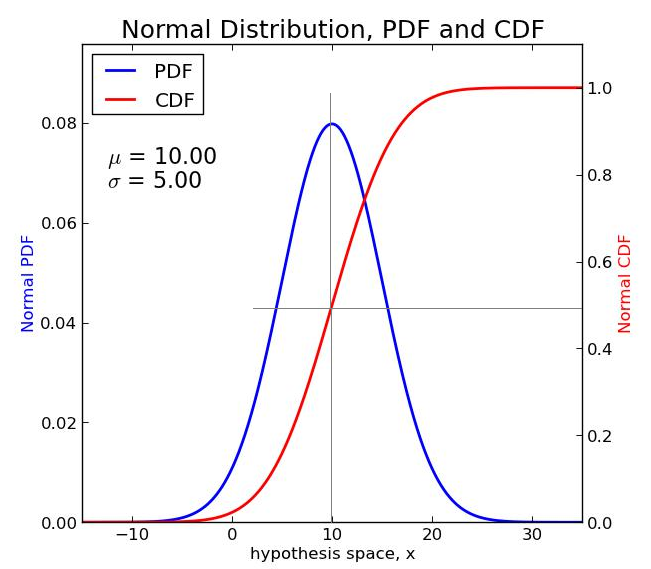

Before going more into how we can find the CDF of an image, lets talk a bit more about how using CDF we can make our PDF more close to a uniform distribution. Our goal -

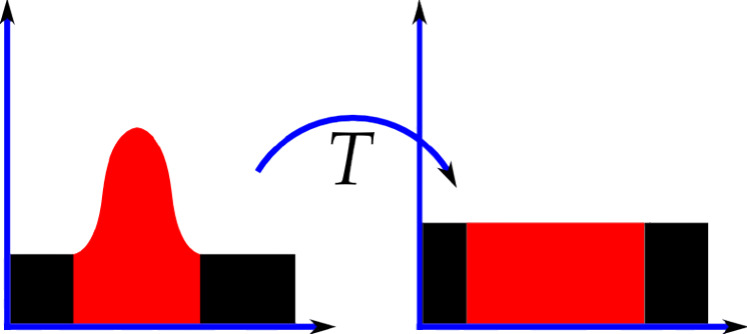

*Image collected from Wikipedia - https://en.wikipedia.org/wiki/Histogram_equalization*

However, this transformation is not possible without selectively picking pixels and changing their values *(not feasible)*. A good bypass is making the CDF of the function on the left match the CDF of the function on the right. While this doesn't convert our original PDF to a uniform PDF, it ensures the PDF is more spread out which provides significant improvement in a lot of cases. The CDF of a uniform distribution is as follows -

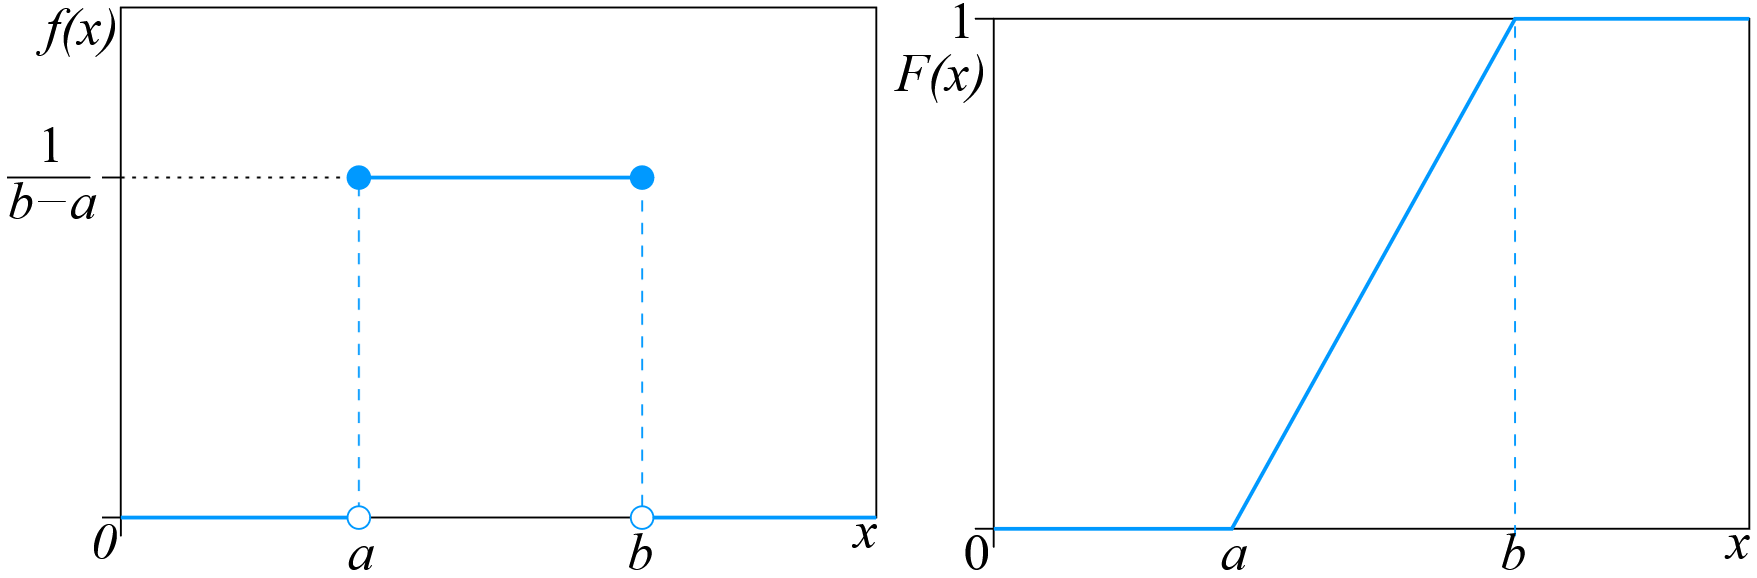

On the left - PDF, on the right - CDF.

*Image collected from Wikipedia - https://en.wikipedia.org/wiki/Continuous_uniform_distribution*

Histogram equalization will make the CDF of any image look similar to the CDF of uniform distribution -

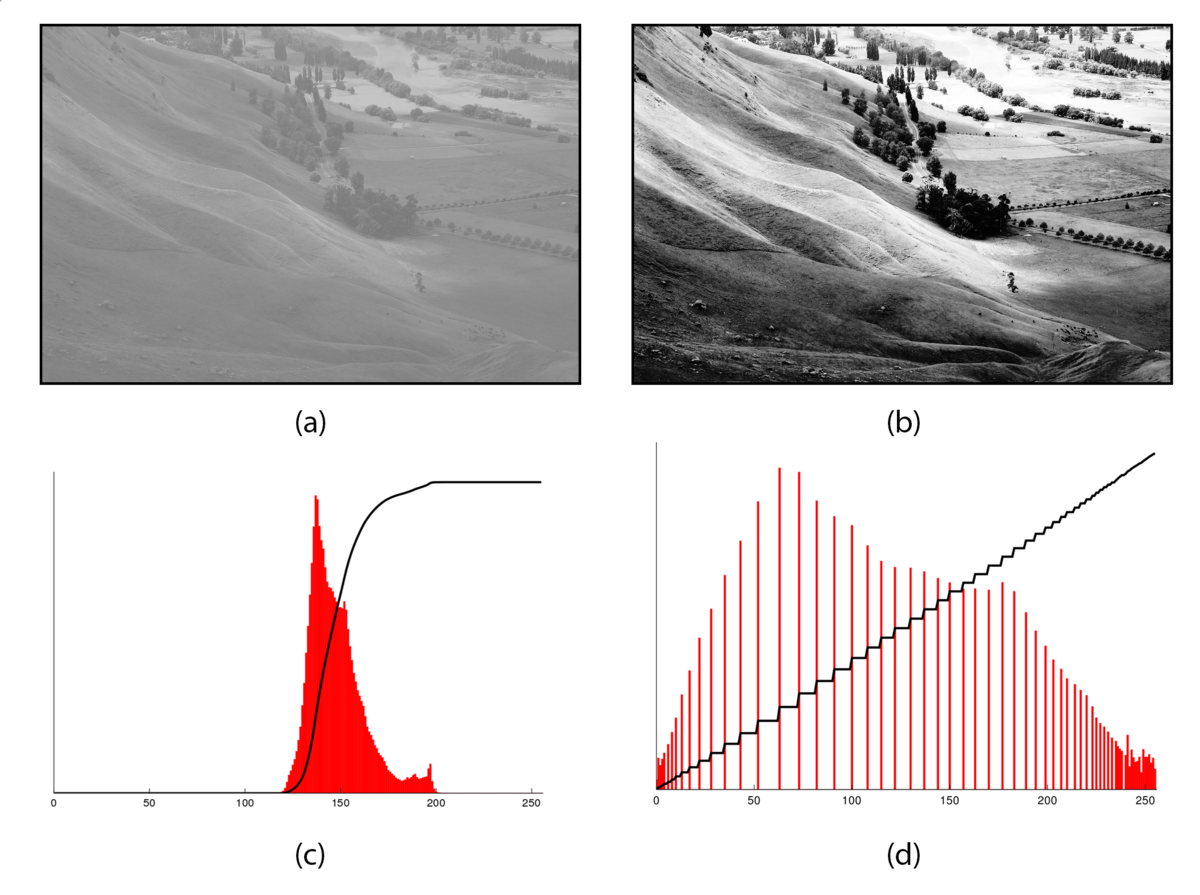

*Image collected from - https://commons.wikimedia.org/wiki/File:Histogram_equalization.png*

At first lets see how to plot the CDF of an image -

## Histeq of grayscale images

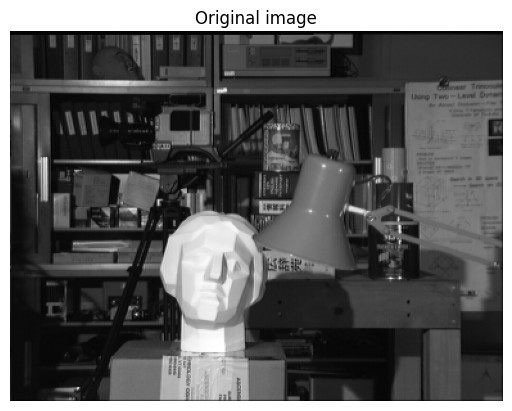

In [18]:
I = io.imread("sample_4.png")
I = ski.img_as_float(I)
plt.imshow(I, cmap = 'gray')
plt.title("Original image")
plt.axis('off');

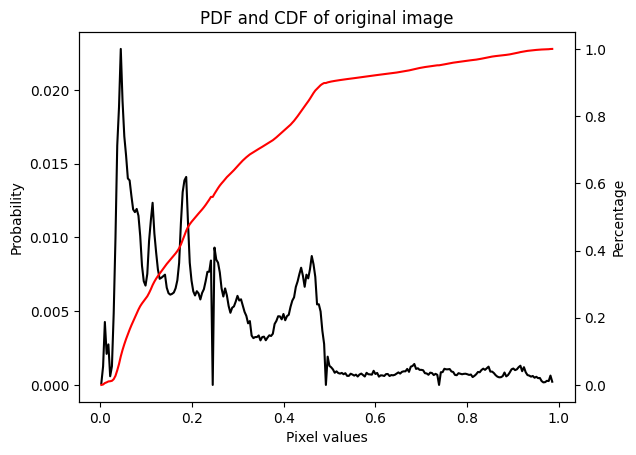

In [19]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of original image");

plt.twinx() #allows us to plot two graphs on the same x axis
img_cdf, bins = exposure.cumulative_distribution(I, nbins=256) #cdf function
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

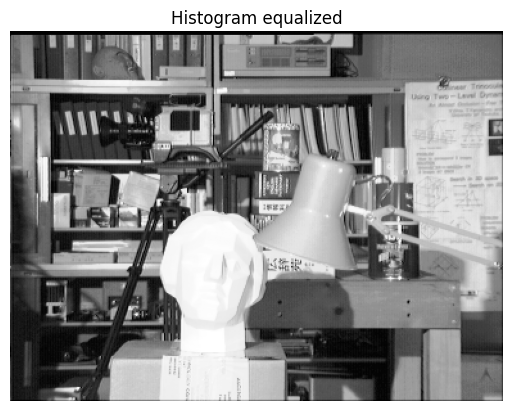

In [ ]:
I_equalized = img_cdf[(I*255).astype(int)]

plt.imshow(I_equalized, cmap = 'grey')
plt.title("Histogram equalized")
plt.axis('off');

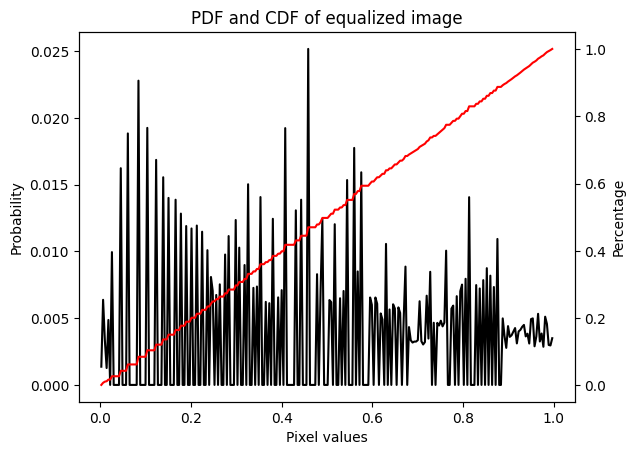

In [ ]:
hist, bins_hist = exposure.histogram(I_equalized, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of equalized image");

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I_equalized, nbins=256)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

Instead of doing histogram equalization manually, we will use `skimage.exposure.equalize_hist()` instead.

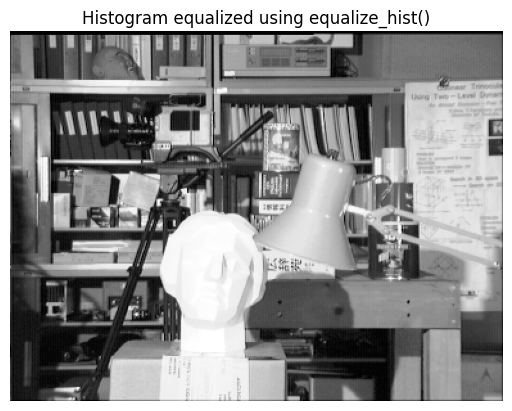

In [ ]:
I_equalized = exposure.equalize_hist(I)

plt.imshow(I_equalized, cmap = 'grey')
plt.title("Histogram equalized using equalize_hist()")
plt.axis('off');

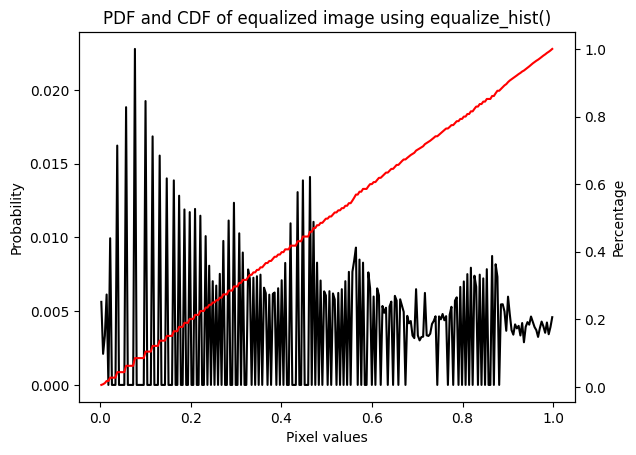

In [ ]:
hist, bins_hist = exposure.histogram(I_equalized, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of equalized image using equalize_hist()");

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I_equalized, nbins=256)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

Does it improve the picture quality? Well in some places, yes. Like the mask and the camera inside the bookshelf is more visible now. But the sculpture face is completely ruined now.

However lets look at the next image -

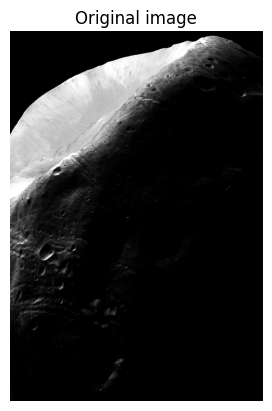

In [ ]:
I = io.imread("/content/sample_5.tif")
I = ski.img_as_float(I)
plt.imshow(I, cmap = 'grey')
plt.title("Original image")
plt.axis('off');

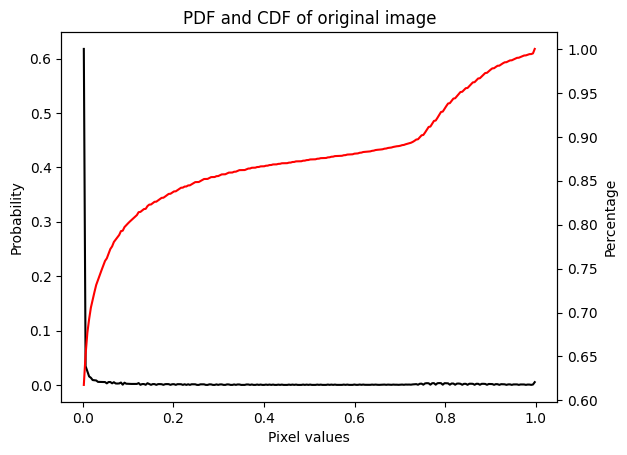

In [ ]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of original image");

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I, nbins=256)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

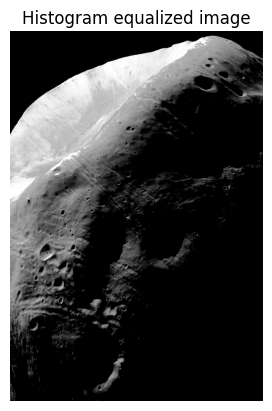

In [ ]:
I_equalized = exposure.equalize_hist(I)

plt.imshow(I_equalized, cmap = 'grey')
plt.title("Histogram equalized image")
plt.axis('off');

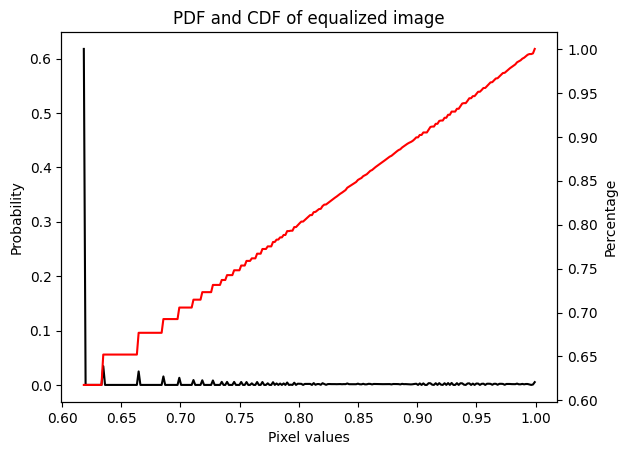

In [ ]:
hist, bins_hist = exposure.histogram(I_equalized, nbins=256, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of equalized image");

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I_equalized, nbins=256)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

The craters that we didn't know existed in the original picture can be seen now in very high details. This is great improvement.

So just like everything in science. There is no panacea. The method works in some cases and doesn't in others.

But there are local variants of histogram equalization that we will study in the next lab, which overcomes a lot of the issues of naive histogram equalization.

##Histeq of RGB images

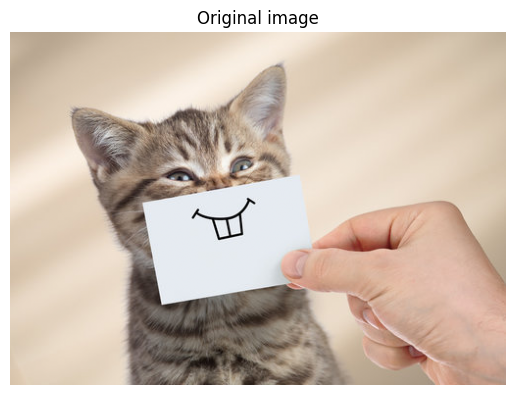

In [ ]:
I = io.imread("/content/sample_6.jpg")
I = ski.img_as_float(I)
plt.imshow(I)
plt.title('Original image')
plt.axis("off");

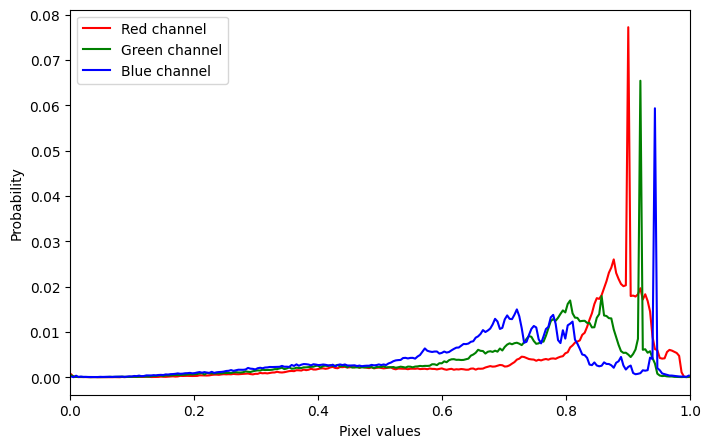

In [ ]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("Pixel values")
    if normalize:
        plt.ylabel("Probability")
    else:
        plt.ylabel("Count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

plot_hist_color(I, normalize = True)
plt.show()

### Histeq of each channel

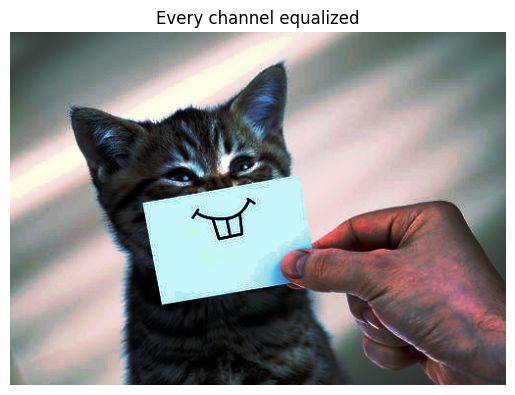

In [ ]:
Ieq = I.copy()
Ieq[:, :, 0] = exposure.equalize_hist(I[:, :, 0])
Ieq[:, :, 1] = exposure.equalize_hist(I[:, :, 1])
Ieq[:, :, 2] = exposure.equalize_hist(I[:, :, 2])

plt.imshow(Ieq)
plt.title('Every channel equalized')
plt.axis("off");

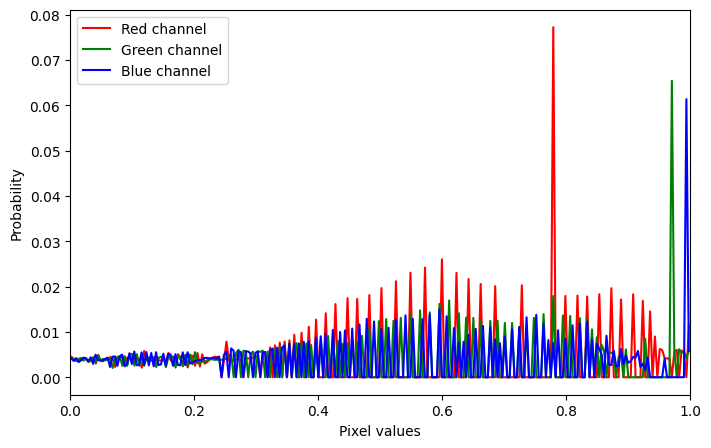

In [ ]:
plot_hist_color(Ieq, normalize = True)
plt.show()

Although histeq improves contrast, equalizing each of the channel ruins the overall color of the image.

So what goes wrong? In grayscale image, intensities are basically a measurement of brightness or illuminance. When we are equalizing the images, we are basically equalizing the illuminance.

Only if there was a way to separate illuminance from RGB space.

### CIELAB

CIELAB, also referred to as L\*a\*b\* or more colloquially lab, is a color space that expresses color as 3 values - L\* for luminescence or perceptual lightness and a\* and b\* for 4 different colors: red, green, blue and yellow

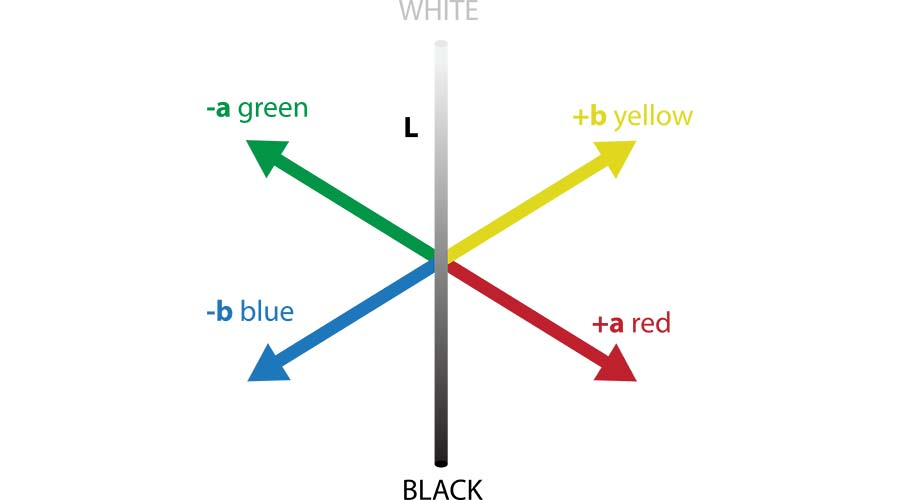

The exact details of the color space is not necessary for us. What interests us is that we can separate the illuminance channel from the rgb implementation. If we histogram equalize the illuminance channel, we can achieve our desired result.

###Histeq using CIELAB

In [ ]:
Ilab = color.rgb2lab(I)
print(I.shape)
print(Ilab.shape)

(360, 506, 3)
(360, 506, 3)


In [ ]:
print(Ilab[:, :, 0].min())
print(Ilab[:, :, 0].max())

0.0
99.92678386264788


Illuminance ranges from 0 to 100, 0 being the darkest and 100 being the brightest. Lets view the illuminance channel -

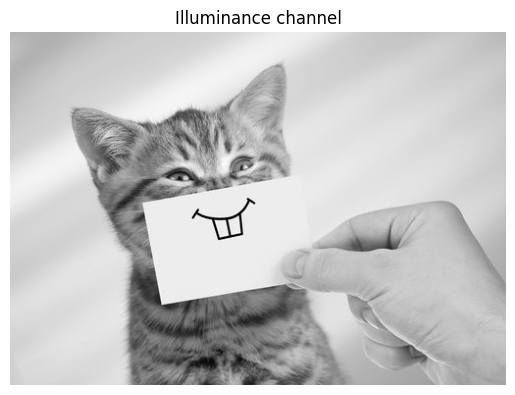

In [ ]:
plt.imshow(Ilab[:, :, 0]/100, cmap = 'grey')
plt.title('Illuminance channel')
plt.axis('off');

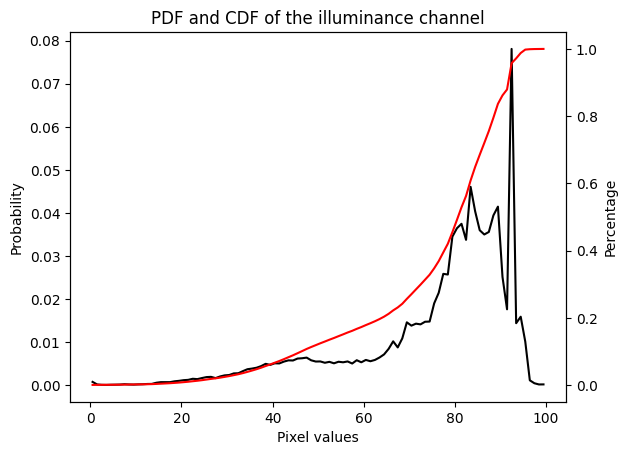

In [ ]:
hist, bins_hist = exposure.histogram(Ilab[:, :, 0], nbins=100, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of the illuminance channel");

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(Ilab[:, :, 0], nbins=100)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

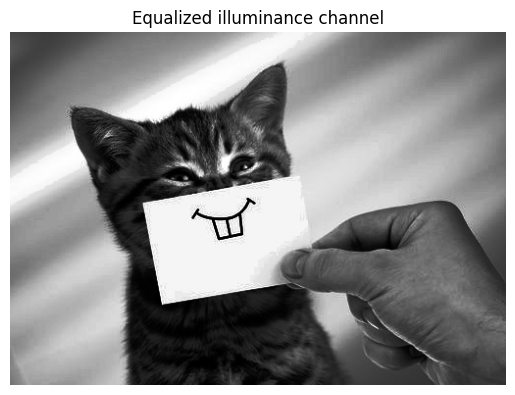

In [ ]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])
plt.imshow(Ieq, cmap = 'grey')
plt.title('Equalized illuminance channel')
plt.axis('off');

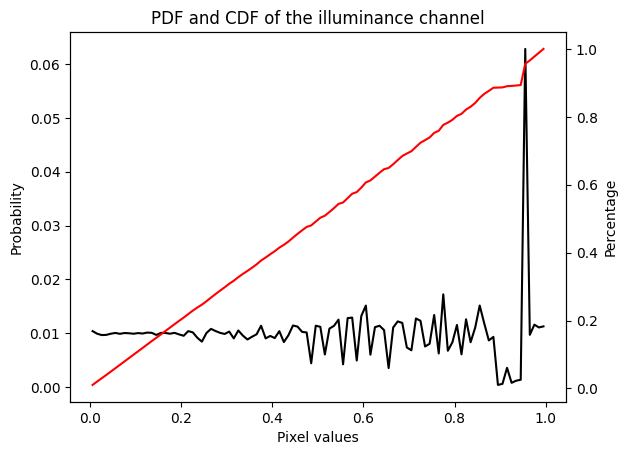

In [ ]:
hist, bins_hist = exposure.histogram(Ieq, nbins=100, normalize=True)

plt.plot(bins_hist, hist, 'k');
plt.xlabel("Pixel values")
plt.ylabel("Probability")
plt.title("PDF and CDF of the illuminance channel");

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(Ieq, nbins=100)
plt.plot(bins, img_cdf, "red");
plt.ylabel("Percentage")
plt.show()

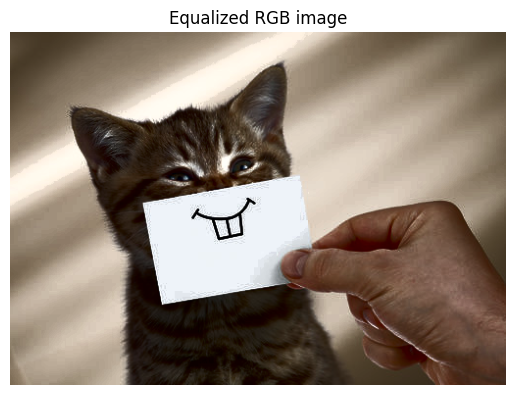

In [ ]:
Irecon = Ilab
Irecon[:,:,0] = Ieq*100

Irecon = color.lab2rgb(Irecon)
plt.imshow(Irecon)
plt.title("Equalized RGB image")
plt.axis("off");